## Importing relevant libraries and loading the dataset

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names=['target', 'id', 'date', 'flag', 'user', 'text'])

In [3]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# We can replace target values: 4 -> 1 (for positive sentiment)
data['target'] = data['target'].replace(4, 1)

In [6]:
data.tail()

,target,id,date,flag,user,text
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,1,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


## Data Cleaning 

In [7]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

In [8]:
# Apply text cleaning
data['cleaned_text'] = data['text'].apply(clean_text)

In [131]:
data.tail()

,target,id,date,flag,user,text,cleaned_text
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom very cool to hear old walt intervie...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time tupac...
1599999,1,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,happy charitytuesday


## Basic Exploratory Data Analysis

In [10]:
print(f"Total Tweets: {len(data)}")
print(data['target'].value_counts())  # Check sentiment distribution

Total Tweets: 1600000
target
0    800000
1    800000
Name: count, dtype: int64


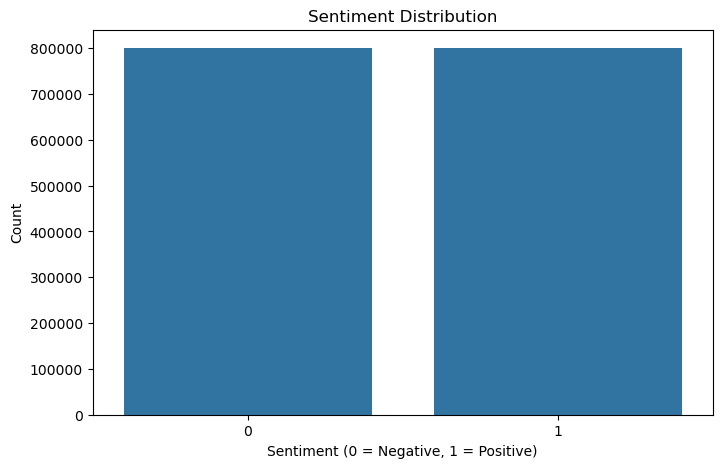

In [11]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='target')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

### Word Cloud Visualization

In [12]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

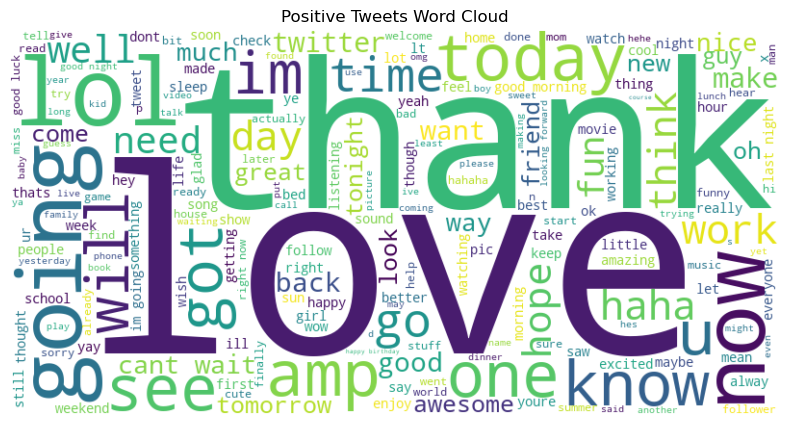

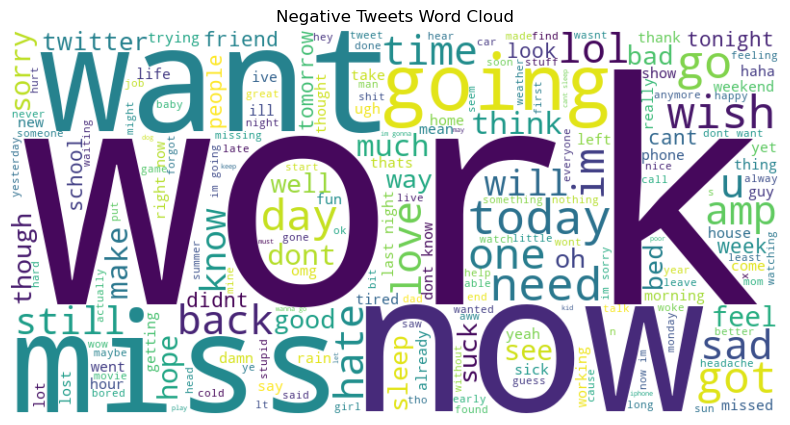

In [14]:
# Generate word clouds for positive and negative tweets
positive_tweets = data[data['target'] == 1]['cleaned_text']
negative_tweets = data[data['target'] == 0]['cleaned_text']

generate_wordcloud(positive_tweets, 'Positive Tweets Word Cloud')
generate_wordcloud(negative_tweets, 'Negative Tweets Word Cloud')

## Data Preprocessing

In [15]:
train_df, test_df= train_test_split(data, test_size=0.3,random_state= 50)

In [16]:
len(train_df), len(test_df)

(1120000, 480000)

In [79]:
print("The Sentiment Distribution for the training set is: ")
print(train_df['target'].value_counts())
print("-" * 60)
print("The Sentiment Distribution for the test set is: ")
print(test_df['target'].value_counts())

The Sentiment Distribution for the training set is: 
target
0    560181
1    559819
Name: count, dtype: int64
------------------------------------------------------------
The Sentiment Distribution for the test set is: 
target
1    240181
0    239819
Name: count, dtype: int64


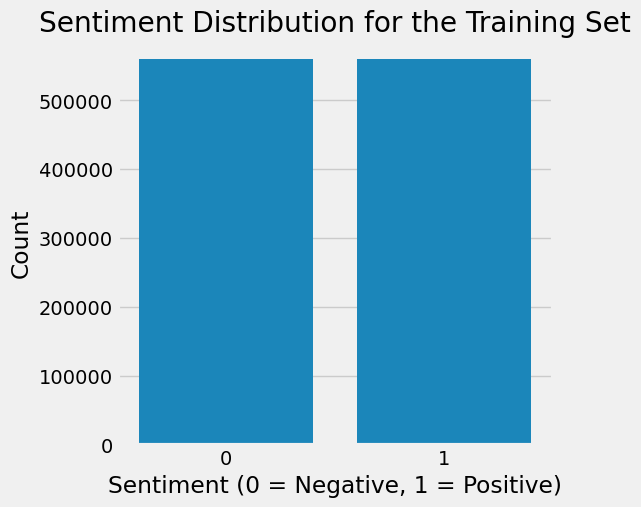

In [83]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_df, x='target')
plt.title('Sentiment Distribution for the Training Set')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

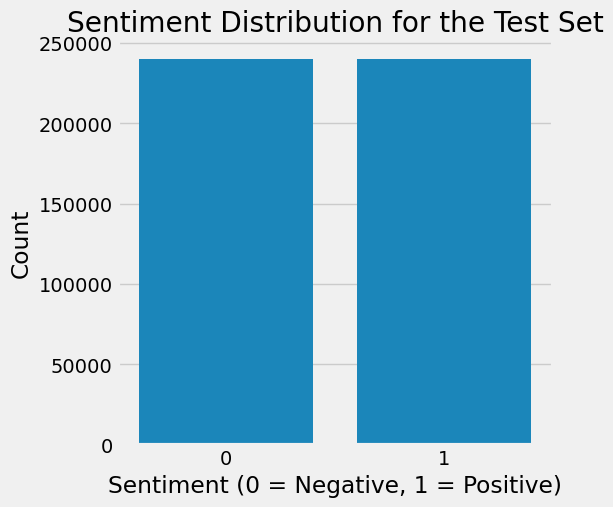

In [84]:
plt.figure(figsize=(5, 5))
sns.countplot(data=test_df, x='target')
plt.title('Sentiment Distribution for the Test Set')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

In [19]:
#Loading in the cleaned text as features and their respective targets as labels for training the model
training_sentences = train_df['cleaned_text'].tolist()
testing_sentences = test_df['cleaned_text'].tolist()
training_labels = train_df['target'].tolist()
testing_labels = test_df['target'].tolist()

In [20]:
print(f'The first ten training sentences are : {training_sentences[:10]}')
print('\n')
print(f'The first ten training labels are: {training_labels[:10]}')

The first ten training sentences are : ['another corking day in an office with aircon and all the curtains drawn i work with vampires  fb', 'yes yes it hasi am getting sick  glad its now and not during vegas dammit', 'wish i was watching the mtv movie awards right now i want to see andy hosting d but i am home now and i dont have a free tv here ', 'guess whos a twit ', 'last beautiful day on the island of islands gonna get back to the uk and step it up a gear  but i will be back real soon', 'is sat infront of a computer and its sunny outside ', 'so bored and tired yesterday waas very fuuuunn ', ' awwwww i soooo miss my savi baby   amp yup happy bday auntie shar lol', 'quotder schatz der weissen falkenquot in the tv magazine they also say it reminds them of stand by me nevertheless its an entertaining film ', ' haha id have to check it out when its released ']


The first ten training labels are: [0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


In [21]:
#Relevant hyperparameters for training
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 600000

In [22]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [23]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Building the Model

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 24)                38424     
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 198,449
Trainable params: 198,449
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [26]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/10
35000/35000 [==============================] - 200s 6ms/step - loss: 0.4413 - accuracy: 0.7931 - val_loss: 0.4239 - val_accuracy: 0.8037
Epoch 2/10
35000/35000 [==============================] - 209s 6ms/step - loss: 0.4119 - accuracy: 0.8104 - val_loss: 0.4180 - val_accuracy: 0.8078
Epoch 3/10
35000/35000 [==============================] - 200s 6ms/step - loss: 0.3976 - accuracy: 0.8184 - val_loss: 0.4206 - val_accuracy: 0.8070
Epoch 4/10
35000/35000 [==============================] - 218s 6ms/step - loss: 0.3862 - accuracy: 0.8251 - val_loss: 0.4204 - val_accuracy: 0.8077
Epoch 5/10
35000/35000 [==============================] - 207s 6ms/step - loss: 0.3776 - accuracy: 0.8301 - val_loss: 0.4277 - val_accuracy: 0.8064
Epoch 6/10
35000/35000 [==============================] - 215s 6ms/step - loss: 0.3707 - accuracy: 0.8341 - val_loss: 0.4305 - val_accuracy: 0.8052
Epoch 7/10
35000/35000 [==============================] - 210s 6ms/step - loss: 0.3654 - accuracy: 0.8369 - val_

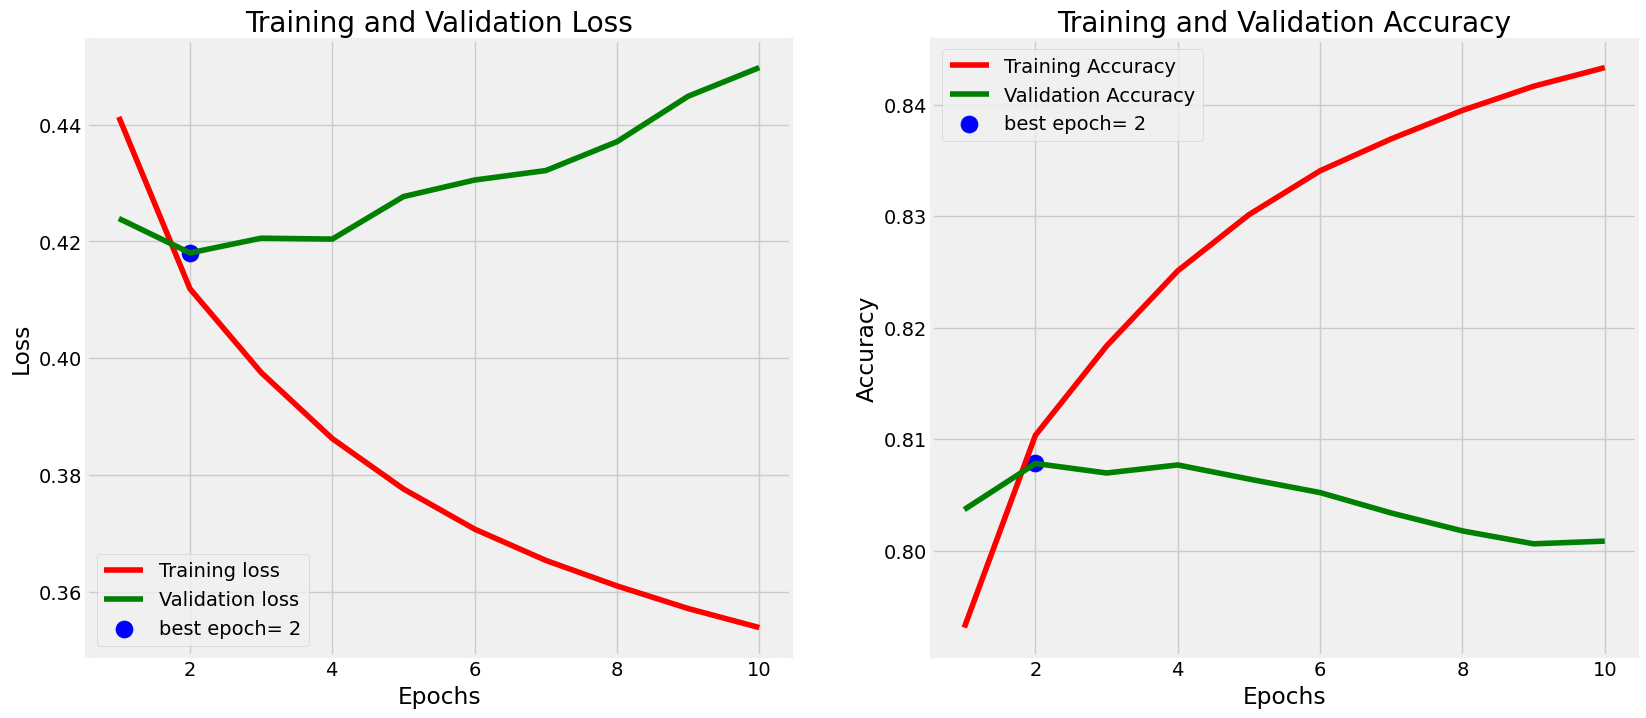

In [27]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

## Evaluating the Model

In [28]:
train_score = model.evaluate(training_padded, training_labels, verbose= 1)
valid_score = model.evaluate(testing_padded, testing_labels, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])

15000/15000 [==============================] - 47s 3ms/step - loss: 0.4498 - accuracy: 0.8009
Train Loss:  0.34013769030570984
Train Accuracy:  0.8507106900215149
--------------------
Validation Loss:  0.4497619569301605
Validation Accuracy:  0.8008624911308289


## Making Predictions

In [126]:
def predict_sentiment(tweet):
    sequences = tokenizer.texts_to_sequences(tweet)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    pred_label = model.predict(padded)
    if pred_label > 0.5:
        print("It is a positive tweet")
    else:
        print("It is a negative tweet")

In [127]:
predict_sentiment(["James is a good guy"])

1/1 [==============================] - 0s 8ms/step
It is a positive tweet


In [129]:
predict_sentiment(["He is not a good person"])

1/1 [==============================] - 0s 14ms/step
It is a negative tweet


In [130]:
predict_sentiment(["I do not feel great today"])

1/1 [==============================] - 0s 19ms/step
It is a negative tweet
